# Multi-class Classification with Tensorlow

To practice multi-class classification, we're try to build a neural network to classify images of different item of clothing.

We try to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket.  for this project we will use the  [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. 



#### Dataset information
Each training and test example is assigned to one of the following labels:

  | Label | Description |
  | --- | --- |
  | 0 | T-shirt/top |
  | 1 | Trouser |
  | 2 | Pullover |
  | 3 | Dress |
  | 4 | Coat |
  | 5 | Sandal |
  | 6 | Shirt |
  | 7 | Sneaker |
  | 8 | Bag |
  | 9 | Ankle boot |

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [14]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [15]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

(<matplotlib.image.AxesImage at 0x7f538c7ba460>, 9)

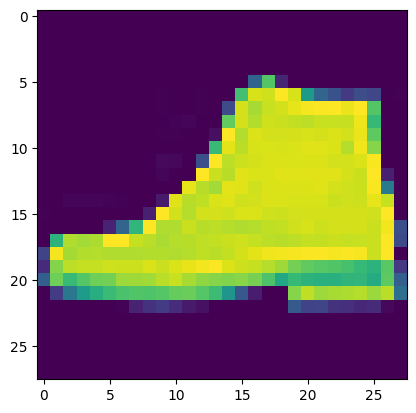

In [21]:
plt.imshow(train_data[42]),train_labels[42]

In [24]:
class_names = ["T-shirt/top","Trouser", "Pullover",
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

In [26]:
len(class_names), len(train_data)

(10, 60000)

In [39]:
NUM_CHOICE = 19500 #@param {type:"slider", min:0, max:60000, step:500}

Text(0.5, 1.0, 'Coat')

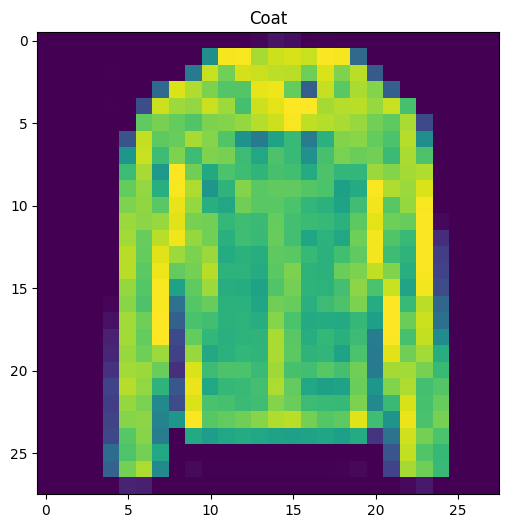

In [60]:
plt.figure(figsize=(6, 6))
plt.imshow(train_data[NUM_CHOICE], cmap = plt.cm.viridis)
plt.title(class_names[train_labels[NUM_CHOICE]])

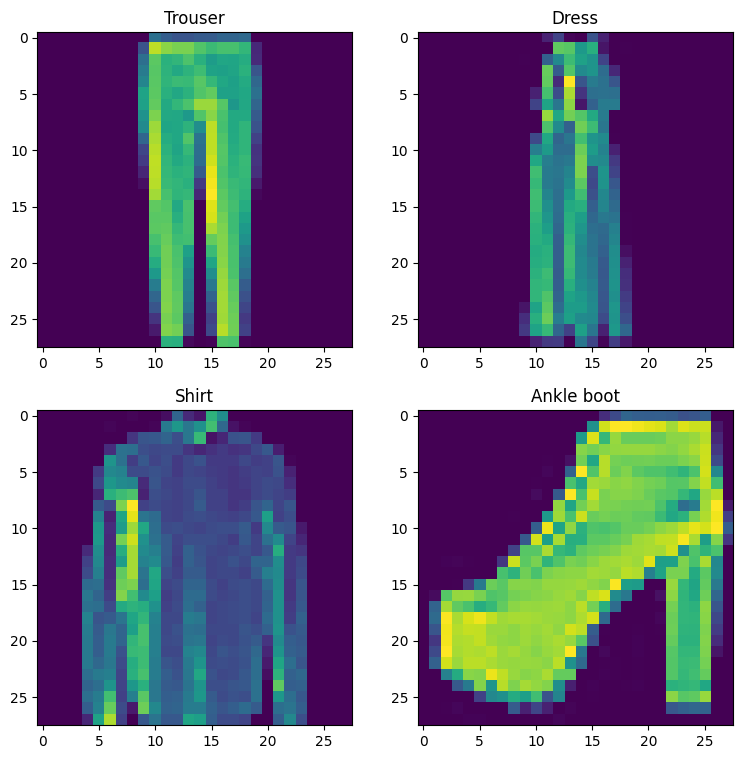

In [62]:
import random 
plt.figure(figsize=(9, 9))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.viridis)
  plt.title(class_names[train_labels[random_index]])
  
  

## Building a multi-class Classification Model

* Input shape = 28 x 28 (The shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss funtion = tf.keras.losses.CateforicalCrosstentropy()
  * More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* Output activation = Softmax 


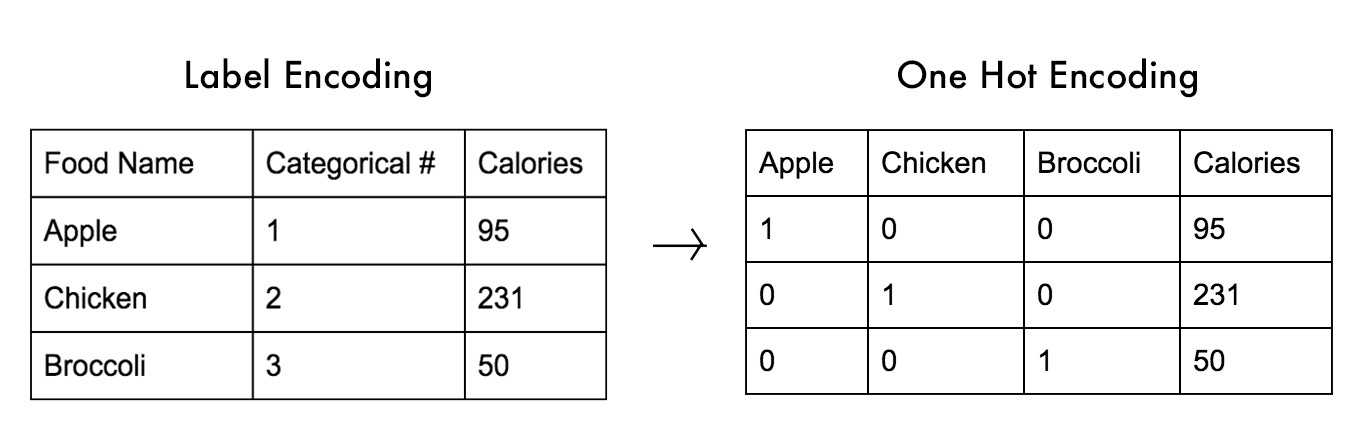

In [72]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)

])
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data, train_labels,
                             epochs = 10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4020 - accuracy: 0.1956 - val_loss: 1.9744 - val_accuracy: 0.2077
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9314 - accuracy: 0.2333 - val_loss: 1.8904 - val_accuracy: 0.2507
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8082 - accuracy: 0.2723 - val_loss: 1.7466 - val_accuracy: 0.3057
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6120 - accuracy: 0.3233 - val_loss: 1.5255 - val_accuracy: 0.3267
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4848 - accuracy: 0.3431 - val_loss: 1.4687 - val_accuracy: 0.3383
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4502 - accuracy: 0.3488 - val_loss: 1.4688 - val_accuracy: 0.3282
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4224 - accuracy: 0.3677 - val_loss: 1.4035 - val_accuracy:

In [73]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [74]:
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).


In [76]:
# Divide train and test images by the maximum value (normalize it)

In [78]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 0.00392156862745098)

In [81]:
#Let's build a model to find patterns in it with normalized data
tf.random.set_seed(42)

#Create a model (same as model_1)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')    
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

norm_history = model_2.fit(train_data, train_labels,
                             epochs = 10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0545 - accuracy: 0.1936 - val_loss: 1.8220 - val_accuracy: 0.2338
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7237 - accuracy: 0.2604 - val_loss: 1.6576 - val_accuracy: 0.2782
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6121 - accuracy: 0.2871 - val_loss: 1.5803 - val_accuracy: 0.2891
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5516 - accuracy: 0.3001 - val_loss: 1.5327 - val_accuracy: 0.3027
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5096 - accuracy: 0.3117 - val_loss: 1.4963 - val_accuracy: 0.3115
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4762 - accuracy: 0.3226 - val_loss: 1.4679 - val_accuracy: 0.3372
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4489 - accuracy: 0.3354 - val_loss: 1.4434 - val_accuracy:

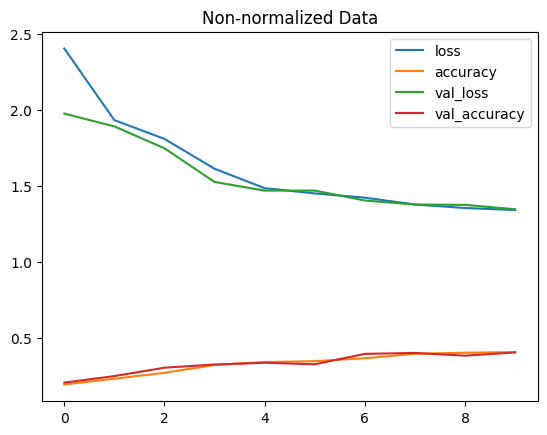

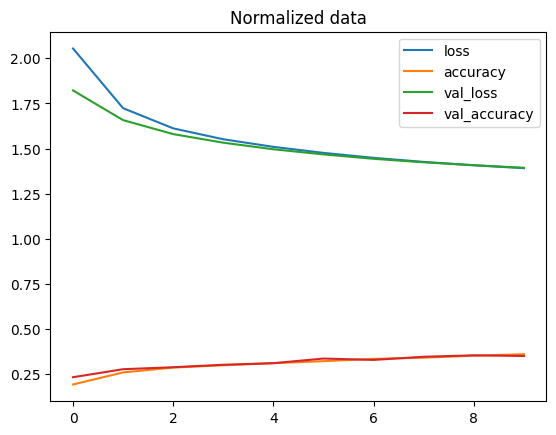

In [82]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");